In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from pathlib import Path
path = Path('/content/gdrive/My Drive/Assessments/Eluvio')

In [4]:
import os
os.listdir(path)

['dataset_car_logo-20220209T181113Z-001.zip',
 'dataset_car_logo',
 '2002-audi-emblem-0083c2-jill-reger.jpg',
 'audi-logo.jpg',
 'temp']

In [5]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo-20220209T181113Z-001.zip') as zipref:
  zipref.extractall('/content/gdrive/My Drive/Assessments/Eluvio/temp')

In [ ]:
!git clone https://github.com/fastai/fastai
!pip install -e "fastai[dev]"

In [1]:
from fastai.vision.all import *

In [5]:
path = Path('/content/gdrive/My Drive/Assessments/Eluvio/temp/dataset_car_logo')
os.listdir(path)

['Test', 'Train']

In [6]:
!pip install efficientnet-pytorch
import warnings
warnings.filterwarnings('ignore')

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=77af19d28001311639c1aab0736e556dd165e885178dbc9377967b70c4c7f53d
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [8]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b7')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth


  0%|          | 0.00/254M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b7


In [9]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=8

In [10]:
path = Path('/content/gdrive/My Drive/Assessments/Eluvio/dataset_car_logo')
dls = ImageDataLoaders.from_folder(path, train = 'Train', valid = 'Test', seed = 786, shuffle = True, item_tfms = item_tfms, batch_tfms = batch_tfms, bs = bs)

In [24]:
dls.c

18

In [31]:
learn = cnn_learner(dls, resnet101, pretrained=True, metrics=[accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [32]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.971111,2.608541,0.419048,00:47


SuggestedLRs(valley=0.0005754399462603033)

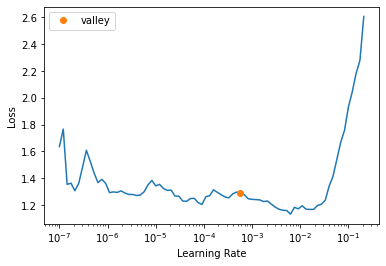

In [33]:
learn.lr_find()

In [34]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.554996,5.233269,0.266667,01:02
1,1.625196,3.542068,0.371429,01:01
2,0.977982,2.081194,0.552381,01:01
3,0.638131,2.174793,0.600000,01:01


In [35]:
learn.unfreeze()
learn.fit_one_cycle(20, lr_max=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.366895,2.018644,0.609524,01:02
1,0.504412,2.788454,0.523810,01:02
2,0.818295,3.036638,0.438095,01:01
3,1.266500,2.853678,0.380952,01:01
4,1.266125,3.541351,0.380952,01:01
5,0.941694,2.873968,0.495238,01:01
6,0.926181,2.479131,0.447619,01:01
7,0.808586,2.710329,0.476190,01:01
8,0.686038,2.895608,0.457143,01:01
9,0.531478,2.546274,0.542857,01:01


In [36]:
clas, clas_idx, probs = learn.predict('/content/gdrive/My Drive/Assessments/Eluvio/audi-logo.jpg'); clas

'Audi'